# Project 6 Linear Regression
Jensen Judkins, Samuel McMillan

In [228]:
#Imports
import pandas as pd
import numpy as np

In [229]:
#Read in the data
df = pd.read_csv("RRCA_baseflow.csv")

Below sets the date according to the offset given in the assignment description. Adds columns for year, month, day, and date which is the full date in the format of year-month-day.

In [230]:
#create another column named "Baseflow" which is just a copy of "Observed"
df['Baseflow'] = df['Observed']

#Offsetting the days
#Date has some idiosyncrasies. Take make it easier to work with, subtract 693963 from the value. The new value is the number of days since Jan 1, 1900.
offset = 693963
df['days_since_1900'] = df['Date'] - offset

#add month, year, and day columns
pd.period_range("1215-01-01", "1381-01-01", freq="D")
period = pd.Period('1900-1-1', freq='D') - pd.Period('0001-2-1', freq='D')
#period
df['days_since_1900'] = df.Date - offset
df['date'] = pd.to_datetime(df.days_since_1900.astype('int'), unit='D', origin=pd.Timestamp('1900-01-01'))
#display(df.head(2))
df.loc[0,'date'].month
df['year'] = df.date.apply(lambda x:pd.to_datetime(x).year)
df['month'] = df.date.apply(lambda x:pd.to_datetime(x).month)
df['day'] = df.date.apply(lambda x:pd.to_datetime(x).day)
df['week'] = df.date.apply(lambda x:pd.to_datetime(x).week)

df.head()


,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,Baseflow,days_since_1900,date,year,month,day,week
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161,0.145161,16769,1945-11-30,1945,11,30,48
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161,0.445161,16800,1945-12-31,1945,12,31,1
2,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203,1.332203,16828,1946-01-28,1946,1,28,5
3,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203,2.932203,16859,1946-02-28,1946,2,28,9
4,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689,3.728689,16889,1946-03-30,1946,3,30,13


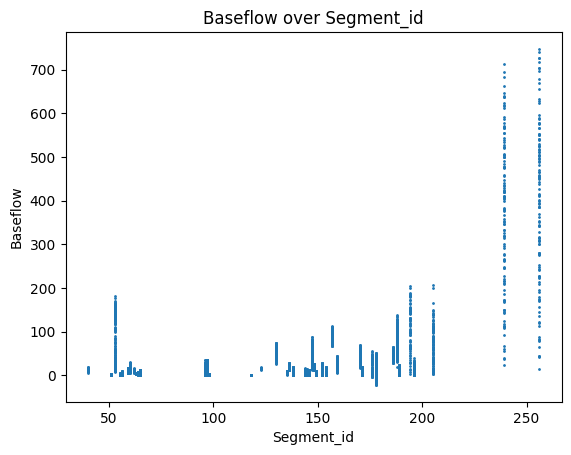

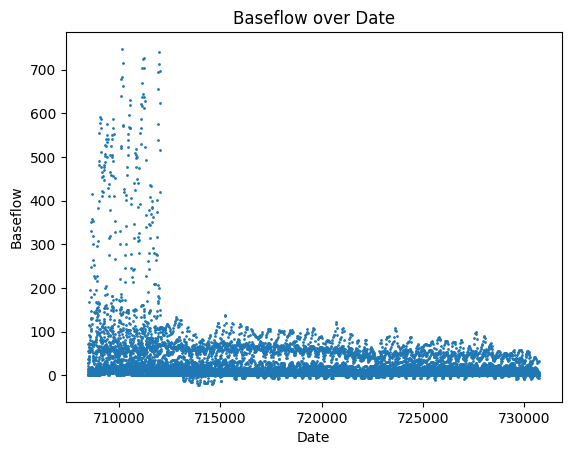

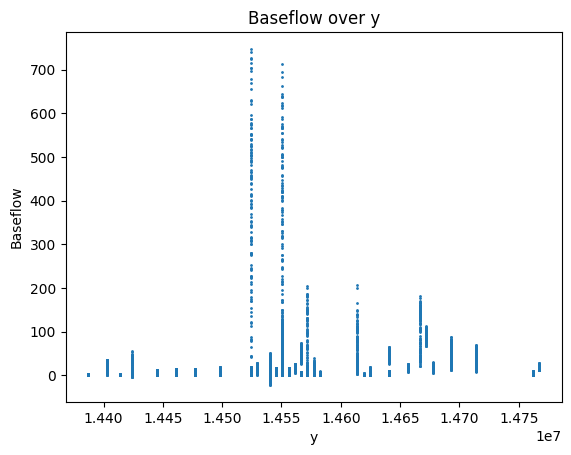

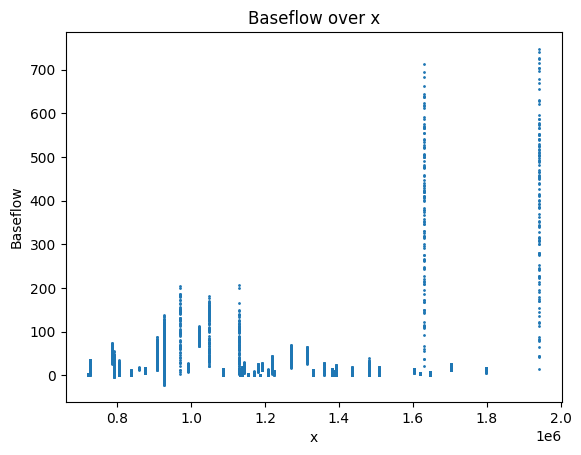

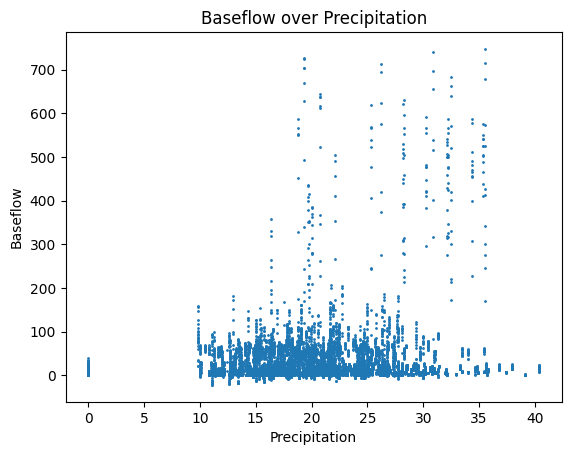

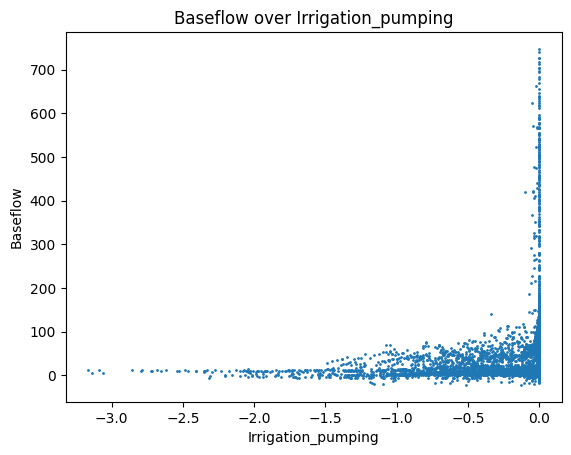

In [231]:
#Scatter plot of the data
import matplotlib.pyplot as plt


#Scatterplot of baseflow and Segment_id
plt.scatter(df['Segment_id'], df['Baseflow'], s=1)
plt.xlabel('Segment_id')
plt.ylabel('Baseflow')
plt.title('Baseflow over Segment_id')
plt.show()

#Scatterplot of baseflow and Date
plt.scatter(df['Date'], df['Baseflow'], s=1)
plt.xlabel('Date')
plt.ylabel('Baseflow')
plt.title('Baseflow over Date')
plt.show()

#Scatterplot of baseflow and y
plt.scatter(df['y'], df['Baseflow'], s=1)
plt.xlabel('y')
plt.ylabel('Baseflow')
plt.title('Baseflow over y')
plt.show()


#Scatterplot of baseflow and x
plt.scatter(df['x'], df['Baseflow'], s=1)
plt.xlabel('x')
plt.ylabel('Baseflow')
plt.title('Baseflow over x')
plt.show()

#Scatterplot of baseflow and Precipitation
plt.scatter(df['Precipitation'], df['Baseflow'], s=1)
plt.xlabel('Precipitation')
plt.ylabel('Baseflow')
plt.title('Baseflow over Precipitation')
plt.show()

#Scatterplot of baseflow and Irrigation_pumping
plt.scatter(df['Irrigation_pumping'], df['Baseflow'], s=1)
plt.xlabel('Irrigation_pumping')
plt.ylabel('Baseflow')
plt.title('Baseflow over Irrigation_pumping')
plt.show()




In [232]:
#make a new dataframe which filteres out y values if that y value ever contains a baseflow value below 0 or above 100
df_filtered = df[(df['Baseflow'] > 0) & (df['Baseflow'] < 100)]


In [242]:
#return the largest (with respect to baseflow) unique values of x in the data

df.groupby('x').Baseflow.max().sort_values(ascending=False).head(10)
#df.groupby('y').Baseflow.max().sort_values(ascending=False).head(10)


x
1941550    747.803280
1630030    712.557380
1128430    206.909836
970030     204.830508
1049230    180.736890
927790     138.676230
1022830    112.504839
906670      88.070000
785230      74.320339
1270990     70.108475
Name: Baseflow, dtype: float64

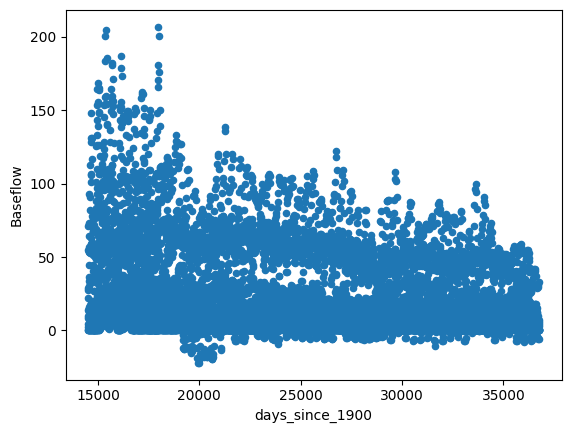

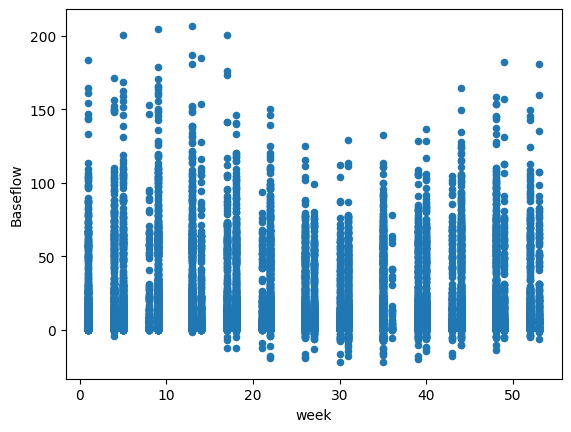

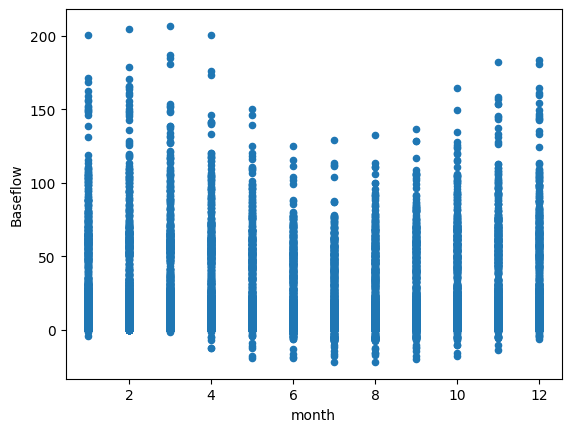

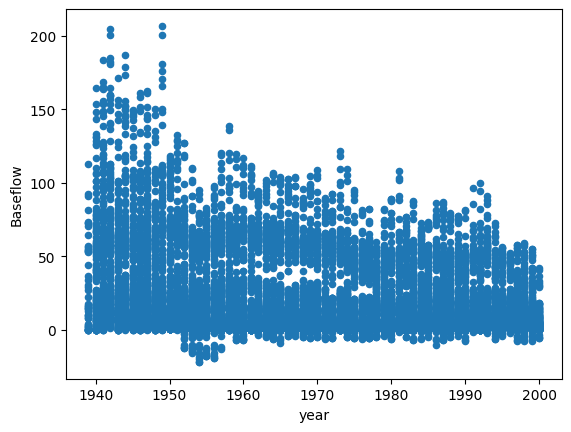

In [234]:
#Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Create a linear regression model
model = LinearRegression()

#Create a training dataset with only x values being NOT 1941550 or NOT 1630030

new_df_test = df[(df['x'] != 1941550) & (df['x'] != 1630030)]

#Multiple feature linear regression
new_df_test.plot.scatter( x='days_since_1900', y='Baseflow')
new_df_test.plot.scatter( x='week', y='Baseflow')
new_df_test.plot.scatter( x='month', y='Baseflow')
new_df_test.plot.scatter( x='year', y='Baseflow')
plt.show()

Mean Squared Error:  302.38170898161195
Coefficients:  [-0.06019268 -0.18148066  0.22772671 -0.68401303]
Intercept:  358.36157593527804
R^2:  0.292861604544723


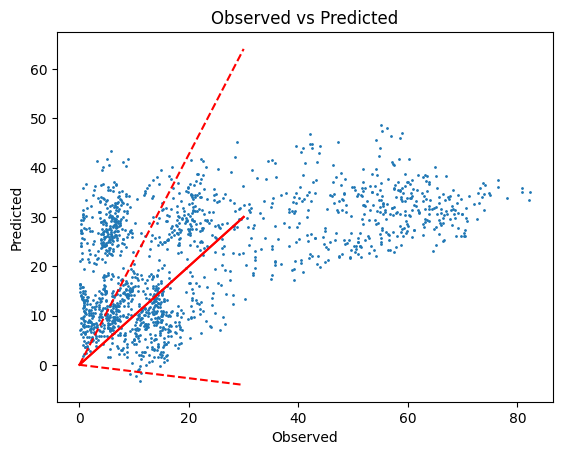

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Observed   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     818.5
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        09:34:51   Log-Likelihood:                -33466.
No. Observations:                7862   AIC:                         6.694e+04
Df Residuals:                    7857   BIC:                         6.698e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                356.9012     22.336     15.979      0.000     313.118     400.685
week                  -0.0571      0.013     -4.481      0.000      -0.082      -0.032
year                  -0.1808      0.011    -15.970      0.000      -0.203      -0.159
Segment_id             0.2282      0.004     53.497      0.000       0.220       0.237
Evapotranspiration    -0.6695      0.061    -10.954      0.000      -0.789      -0.550
==============================================================================
Omnibus:                      233.438   Durbin-Watson:                   0.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.459
Skew:                           0.412   Prob(JB):                     1.36e-53
Kurtosis:                       2.748   Cond. No.                     2.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [247]:
#Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Create a linear regression model
model = LinearRegression()

#Create a training dataset
#df['x'].isin([1941550, 1630030]) 
#new_df = df[(df['y'].isin([14524320,14550720]))]
#new_df = df[(df['x'].isin([1941550, 1630030]))]
#(df['x'] != 1941550) & (df['x'] != 1630030) & (df['y'] != 14524320) & (df['y'] != 14550720) &

#Make sure y doesnt contain any of these values
# 14524320    747.803280
# 14550720    712.557380
# 14614080    206.909836
# 14571840    204.830508
# 14666880    180.736890
# 14672160    112.504839

#Make sure x doesnt contain any of these values
# 1941550    747.803280
# 1630030    712.557380
# 1128430    206.909836
# 970030     204.830508
# 1049230    180.736890
# 927790     138.676230
# 1022830    112.504839


new_df = df[((df['Precipitation'] != 0) & (df['x'] != 1941550) & (df['x'] != 1630030) & (df['y'] != 14524320) & (df['y'] != 14550720) & (df['y'] != 14614080) & (df['y'] != 14571840) & (df['y'] != 14666880) & (df['y'] != 14672160) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030))]


#Multiple feature linear regression
feature_cols = ['week','year', 'Segment_id', 'Evapotranspiration']
X = new_df[feature_cols]
y = new_df.Observed


#Train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mse)

#Print the coefficients
print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)
print('R^2: ', model.score(X_test, y_test))

#Plot observed vs predicted and the line of best fit
plt.scatter(y_test, y_pred, s=1)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Observed vs Predicted')
plt.plot([0, 30], [0, 30], color='red')

#Add to the plot 95% confidence intervals
plt.plot([0, 30], [0, 30], color='red')
plt.plot([0, 30], [0, 30+1.96*np.sqrt(mse)], color='red', linestyle='dashed')
plt.plot([0, 30], [0, 30-1.96*np.sqrt(mse)], color='red', linestyle='dashed')
plt.show()

#Hypothesis testing with p-values
import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()


